In [1]:
# Step 1: Import the relevant python libraries for the analysis
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import pylab as pl

In [2]:
# Step 2: Load the dataset
materna = pd.read_csv('mortalidad_materna.csv')
#materna.info()

In [3]:
# Question: What is the Average Age of Maternal Death in Mexico?
# Follow-Up Question: How does it relate to the spread of ages within the data set?

In [4]:
# 1: Combine patient birthdate information into one column
birth = DataFrame(materna, columns=['Año de nacimiento', 'Mes de nacimiento', 'Día de nacimiento'])
birth = materna['Año de nacimiento'].map(str) + '-' + materna['Mes de nacimiento'].map(str) + '-' + materna['Mes de nacimiento'].map(str)
print(birth.sort_values(ascending=True).head(2))
len(birth)

13088    0-0-0
12833    0-0-0
dtype: object


18163

In [5]:
# 2: Combine patient date of death information into one column
death = DataFrame(materna, columns=['Año de la defunción', 'Mes de la defunción', 'Día de la defunción'])
death = materna['Año de la defunción'].map(str) + '-' + materna['Mes de la defunción'].map(str) + '-' + materna['Mes de la defunción'].map(str)
print(death.sort_values(ascending=True).head(2))
len(death)

17886       0-0-0
17516    1914-3-3
dtype: object


18163

In [6]:
# 3. Create variable to store age fulfilled by patient and mortality reason
last_age = materna['Edad cumplida']
mortality_reason = materna['Razón de mortalidad materna']

In [7]:
# 4: Create a sub-dataframe to hold all date- information 
dates = pd.concat([birth, death, last_age, mortality_reason], axis=1)
dates.columns = ['Date of Birth', 'Date of Death', 'Age at Death', 'Reason for Mortality']
dates.head(2)

,Date of Birth,Date of Death,Age at Death,Reason for Mortality
0,1972-7-7,2002-3-3,29,1
1,1967-4-4,2003-5-5,36,1


In [8]:
# 5: Order dates dataframe to list in ascending order of approx. age at death
dates = dates.sort_values(by=['Age at Death'],ascending=True,)
dates.head()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality
9598,1998-7-7,2009-7-7,11,1
6407,1996-1-1,2008-12-12,12,1
9084,2001-12-12,2014-5-5,12,1
10883,1983-11-11,2002-6-6,12,1
1266,1993-0-0,2005-1-1,12,1


In [9]:
# 6: Reset Index 
dates = dates.reset_index(drop=True)
dates.head()
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality
18158,0-0-0,1975-2-2,998,0
18159,0-0-0,2006-9-9,998,1
18160,0-0-0,2000-6-6,998,0
18161,0-0-0,0-0-0,998,0
18162,0-0-0,2002-4-4,998,1


In [10]:
# 7: Remove rows with NaN / '0-0-0' values in Date of Birth
dates = dates[dates['Date of Birth'] != '0-0-0']
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality
18134,1933-12-12,2015-8-8,81,0
18135,1933-11-11,2015-12-12,82,0
18136,1933-8-8,2015-9-9,82,0
18137,1930-1-1,2016-2-2,86,0
18138,1930-8-8,2017-1-1,86,0


In [11]:
# 8: Remove rows with 0 values in Reason for Mortality
dates = dates[dates['Reason for Mortality'] != 0 ]
dates.tail()

,Date of Birth,Date of Death,Age at Death,Reason for Mortality
18113,1960-3-3,2010-10-10,50,1
18116,1960-1-1,2011-10-10,51,1
18121,1963-12-12,2017-10-10,53,1
18123,1961-8-8,2015-5-5,53,1
18125,1942-12-12,2002-12-12,54,1


In [12]:
# 9: Analyze new shape of data
dates.describe()

,Age at Death,Reason for Mortality
count,16636.000000,16636.0
mean,28.356756,1.0
std,7.323171,0.0
min,11.000000,1.0
25%,22.000000,1.0
50%,28.000000,1.0
75%,34.000000,1.0
max,54.000000,1.0


In [18]:
# 10. Record/calculate mean age of maternal death
int(dates['Age at Death'].mean())

28

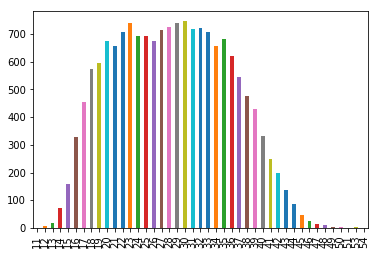

In [17]:
# 11. Plot spread of maternal death via bar graph 
dates['Age at Death'].value_counts().sort_index().plot(kind='bar')

Text(0.5,1,'Age Distribution Associated with the Incidence of Maternal Mortality in Mexico')

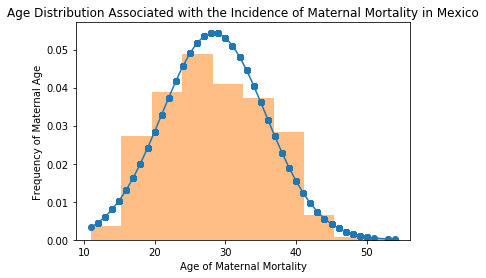

In [36]:
# (11a) Plot spread of maternal death by decade via histogram and add normal curve onto graph
age_death = dates['Age at Death']
fit = stats.norm.pdf(age_death, np.mean(age_death), np.std(age_death))
pl.plot(age_death,fit,'-o')
pl.hist(age_death, density=True, alpha=0.5)

# Label axis 
pl.xlabel('Age of Maternal Mortality')
pl.ylabel('Frequency of Maternal Age')
pl.title('Age Distribution Associated with the Incidence of Maternal Mortality in Mexico')